In [237]:
import seaborn as sns
import os
import pandas as pd
import numpy as np
np.random.seed(1337)
from IPython.display import Image
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import read_csv
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns 

import sklearn
from sklearn.linear_model import ElasticNet
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
train = pd.read_csv('/Users/quent1/Desktop/Cranfield assignment/Statistical learning methods/code/train_selected.csv')
test = pd.read_csv('/Users/quent1/Desktop/Cranfield assignment/Statistical learning methods/code/test_selected.csv')
test_ttf = pd.read_csv('/Users/quent1/Desktop/Cranfield assignment/Statistical learning methods/code/test_selected_ttf.csv')
scaler = MinMaxScaler()

train =train.drop(['label_bnc'],axis=1)
test =test.drop(['id'],axis=1)
X_test = test.values[:,1:6]
test_ttf = test_ttf['ttf']
test_ttf

/Users/quent1/Desktop/Untitled_Message/Filtering_technique.ipynb


0     112
1      98
2      69
3      82
4      91
     ... 
95    137
96     82
97     59
98    117
99     20
Name: ttf, Length: 100, dtype: int64

In [180]:
X_test.shape

(100, 5)

In [154]:
train_ttf = pd.DataFrame(train.ttf)
train_ttf

,ttf
0,191
1,190
2,189
3,188
4,187
...,...
20626,4
20627,3
20628,2
20629,1


Text(0, 0.5, 'Original id')

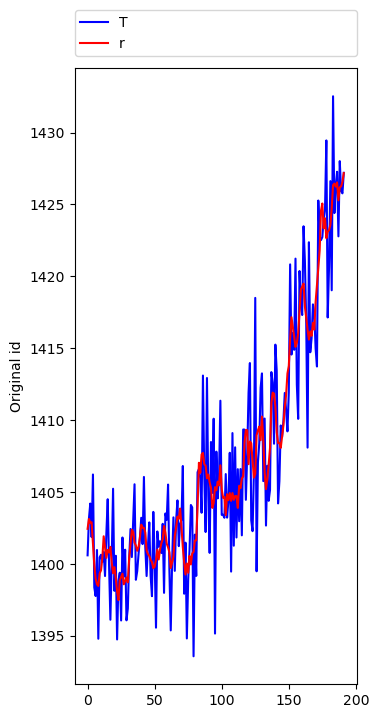

In [210]:
from scipy import signal

fig = plt.figure(figsize = (8, 8))
fig.add_subplot(1,2,1)
plt.plot(train[train.id==1].s1, color="blue")
y_smooth = signal.savgol_filter(train[train.id==1].s1, window_length=10, polyorder=2, mode="nearest")
plt.plot(y_smooth, color="red")

plt.legend('Train', bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0)
plt.ylabel('Original id')


Intéret du lissage


In [264]:
def lissage_savgol(X):
    X_lissed = pd.DataFrame(columns=['id', 'cycle', 's1','s2','s3','s4'])
    for i in range(1,101):
        
            y_smooth_s1 = np.array(signal.savgol_filter(train[train.id==i].s1, window_length=10, polyorder=1, mode="nearest"))
            y_smooth_s2 = signal.savgol_filter(train[train.id==i].s2, window_length=10, polyorder=1, mode="nearest")
            y_smooth_s3 = signal.savgol_filter(train[train.id==i].s3, window_length=10, polyorder=1, mode="nearest")
            y_smooth_s4 = signal.savgol_filter(train[train.id==i].s4, window_length=10, polyorder=1, mode="nearest")
            y_smooth_s1.reshape(-1,1)
    
            df = pd.DataFrame({'id': i , 'cycle': [i+1 for i in range(y_smooth_s1.shape[0])],'s1':y_smooth_s1, 's2': y_smooth_s2, 's3': y_smooth_s3, 's4': y_smooth_s4 }, index = [i+1 for i in range(y_smooth_s1.shape[0])]
                     )

            X_lissed = pd.concat([X_lissed,df])
    return X_lissed
X_train_lisssed = lissage_savgol(train)

X_train_lisssed = X_train_lisssed.drop(['id'], axis=1)


Text(0, 0.5, 'Original id')

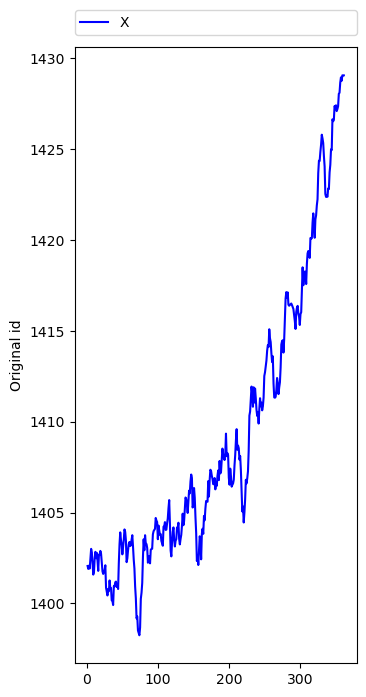

In [246]:
from scipy import signal

fig = plt.figure(figsize = (8, 8))
fig.add_subplot(1,2,1)
plt.plot(X_train_lisssed[X_train_lisssed.id==69].S1, color="blue")

plt.legend('X_train_lisssed', bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0)
plt.ylabel('Original id')

In [227]:
train_ttf = np.ravel(train_ttf)
train_ttf.shape

(20631,)

In [258]:
test

,cycle,s1,s2,s3,s4
0,31,1398.91,554.42,47.23,521.79
1,49,1410.83,553.52,47.67,521.74
2,126,1418.89,552.59,47.88,520.83
3,106,1406.88,552.64,47.65,521.88
4,98,1419.36,553.29,47.46,521.00
...,...,...,...,...,...
95,97,1397.94,553.99,47.14,522.30
96,134,1410.92,554.05,47.38,521.58
97,121,1415.47,553.44,47.66,521.53
98,97,1397.98,554.75,47.26,521.82


In [265]:

regressor = GradientBoostingRegressor()
regressor.fit(X_train_lisssed, np.ravel(train_ttf))

GradientBoostingRegressor()

In [266]:
score = regressor.predict(test)
X_test.shape
score.shape

(100,)

In [223]:
test_ttf.shape

(100,)

In [267]:
from sklearn import metrics
print("Gradient Boosting R-squared", "{:.2%}".format(metrics.r2_score(test_ttf, score)))

Gradient Boosting R-squared 51.39%


In [194]:
df1 = pd.concat([test_ttf, pd.Series(score)], axis=1)
df1.columns = ['true', 'predicted']

In [268]:
df1['diff'] = df1['predicted']-df1['true']
df1

,true,predicted,diff
0,112,185.172545,73.172545
1,98,112.112818,14.112818
2,69,31.705312,-37.294688
3,82,98.867909,16.867909
4,91,62.987171,-28.012829
...,...,...,...
95,137,176.530090,39.530090
96,82,71.341070,-10.658930
97,59,40.627838,-18.372162
98,117,171.735328,54.735328


In [225]:
pd.DataFrame({'Count': [(df1['diff']<0).sum(), (df1['diff']==0).sum(),
 (df1['diff']>0).sum()]}, columns=['Count'],
 index=['Smaller', 'Zero', 'Larger'])

,Count
Smaller,39
Zero,0
Larger,61


In [197]:
df1['diff'] = df1['predicted']-df1['true']
df1.head()

,true,predicted,diff
0,112,185.172545,73.172545
1,98,112.112818,14.112818
2,69,31.705312,-37.294688
3,82,98.867909,16.867909
4,91,62.987171,-28.012829


In [229]:
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import NearestNeighbors
from sklearn import svm
Lasso = linear_model.Lasso(alpha=0.1)
BayesRidge = linear_model.BayesianRidge()
Lasso = linear_model.LassoLars(alpha=.1, normalize=False)
gnb = GaussianNB()
SVM = svm.SVR()

In [269]:
Lasso.fit(X_train_lisssed,train_ttf)
BayesRidge.fit(X_train_lisssed,train_ttf)


gnb.fit(X_train_lisssed,train_ttf)

SVM.fit(X_train_lisssed,train_ttf)


SVR()

In [233]:
X_test

array([[  31.  , 1398.91,  554.42,   47.23,  521.79],
       [  49.  , 1410.83,  553.52,   47.67,  521.74],
       [ 126.  , 1418.89,  552.59,   47.88,  520.83],
       [ 106.  , 1406.88,  552.64,   47.65,  521.88],
       [  98.  , 1419.36,  553.29,   47.46,  521.  ],
       [ 105.  , 1404.49,  553.73,   47.51,  521.56],
       [ 160.  , 1413.57,  553.42,   47.32,  522.32],
       [ 166.  , 1413.89,  553.51,   47.59,  520.53],
       [  55.  , 1410.27,  552.58,   47.58,  521.65],
       [ 192.  , 1398.99,  552.88,   47.59,  521.82],
       [  83.  , 1414.22,  552.8 ,   47.67,  520.74],
       [ 217.  , 1409.64,  553.36,   47.37,  522.03],
       [ 195.  , 1414.51,  553.28,   47.52,  521.3 ],
       [  46.  , 1408.35,  553.75,   47.57,  520.66],
       [  76.  , 1400.61,  554.08,   47.25,  522.12],
       [ 113.  , 1401.  ,  554.6 ,   47.37,  521.77],
       [ 165.  , 1412.54,  553.49,   47.55,  521.52],
       [ 133.  , 1419.18,  553.36,   47.7 ,  521.06],
       [ 135.  , 1406.32,  5

In [270]:
scoreLassso = Lasso.predict(test)
scoreBayes = BayesRidge.predict(test)
scoregnb = gnb.predict(test)
scoresvm= SVM.predict(test)


In [271]:
from sklearn import metrics
print("Gradient Boosting R-squared", "{:.2%}".format(metrics.r2_score(test_ttf, scoreLassso)))
print("Gradient Boosting R-squared", "{:.2%}".format(metrics.r2_score(test_ttf, scoreBayes)))

print("Gradient Boosting R-squared", "{:.2%}".format(metrics.r2_score(test_ttf, scoregnb)))
print("Gradient Boosting R-squared", "{:.2%}".format(metrics.r2_score(test_ttf, scoresvm)))



Gradient Boosting R-squared 34.99%
Gradient Boosting R-squared 38.20%
Gradient Boosting R-squared 4.05%
Gradient Boosting R-squared 27.88%


In [ ]:
print(X_train_lisssed)